## Install the necessary modules

In [ ]:
!pip install numpy matplotlib sympy
!pip install mayavi

In [19]:
%matplotlib inline

## Import the modules

In [59]:
import numpy as np
import sympy as sym
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Some definitions
- Cannonical Inner Product
- Euclidean Inner Product
- Gram Matrix
- Basis for Skew-Symmetric Matrices
- Cayley Transform
- Skew-Symmetric and Symmetric Projections of a Matrix
- Get a random k-frame A

In [60]:
def cannonical_inner_product(Z1, Z2, A, A_p):
  C1 = A.T @ Z1
  C2 = A.T @ Z2

  B1 = A_p.T @ Z1
  B2 = A_p.T @ Z2

  return np.trace(C1.T @ C2)/2.0 + np.trace(B1.T @ B2)

def euclidean_inner_product(Z1, Z2, A, A_p):
  C1 = A.T @ Z1
  C2 = A.T @ Z2

  B1 = A_p.T @ Z1
  B2 = A_p.T @ Z2

  return np.trace(C1.T @ C2) + np.trace(B1.T @ B2)

def generate_gram_matrix(ms, inner_product, A, A_p):
  N = len(ms)
  gram = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      gram[i,j] = inner_product(ms[i], ms[j], A, A_p)
  return gram

def skew_symmetric_base(k):
  C = []
  for i in range(k):
        for j in range(k):
            if i < j:
                c = np.zeros((k,k))
                c[i,j] = 1
                c[j,i] = -1
                C.append(c)
  return C

def cayley(A):
  n = A.shape[0]
  return (sym.eye(n)+A).inv() @ sym.Matrix(sym.eye(n)-A)

def pretty_print(M):
  for l in M:
    print('\t'.join(list(map(str, l))))


def to_sympy(l):
  if isinstance(l, list):
    return [sym.Matrix(m) for m in l]

def get_skew(A):
  return (A-A.T)/2

def get_sym(A):
  return (A+A.T)/2

def get_CB(W):
  global A, A_p
  return A.T @ W, A_p.T @ W

def generate_A(n, k):
  A, _, _ = np.linalg.svd(np.random.uniform(size=(n, k)))
  return A[:, :k]

Set the dimensions then run the next two cells to test it

In [61]:
n = 3
k = 1

In [62]:
A = generate_A(n,k)
A

array([[0.35433392],
       [0.0189172 ],
       [0.9349276 ]])

## Function for generating the basis for the tanged space of the Stiefel Manifold at A

In [63]:
def T_A(A):
    k = A.shape[1]
    n = A.shape[0]
    A_p,_,_ = np.linalg.svd(A)
    A_p = A_p[:, k:]
    B = []
    for i in range((n-k)*k):
        b_i = np.zeros((n-k,k))
        b_i[i//k, i%k] = 1
        B.append(b_i)


    C = skew_symmetric_base(k)

    TB = []
    for b in B:
        TB.append(A @ np.zeros((k,k)) + A_p @ b)
    for c in C:
        TB.append(A @ c + A_p @ np.zeros((n-k,k)))
    return C, B, TB, A_p

Generate the tangent space

In [64]:
C,B,TB, A_p = T_A(A)

Output the basis for the Skew-Symmetric Part ($C$)

In [65]:
C

[]

Output the basis for $B$

In [66]:
B

[array([[1.],
        [0.]]),
 array([[0.],
        [1.]])]

Check whether the tangent space is indeed the tangent space

In [67]:
for b in TB:
    print(np.around(b.T @ A + A.T @ b , decimals=8))

[[0.]]
[[0.]]


Print the basis for the tangent space

In [68]:
for b in TB:
    print(b)

[[-0.0189172 ]
 [ 0.99973577]
 [-0.01305898]]
[[-0.9349276 ]
 [-0.01305898]
 [ 0.35459815]]


Verify whether the size of the generated basis is the same as the expected one

In [69]:
print("\033[92m Dimensions Match!") if len(TB) == int(k*(k-1)/2+(n-k)*k) else print("\033[91m Dimensions DON't Match!")

 Dimensions Match!


Print the Gram Matrix along the basis for the Tangent Space

In [70]:
print("Gram Matrix")
print(np.around(generate_gram_matrix(TB,euclidean_inner_product,A,A_p), decimals=12))

Gram Matrix
[[ 1. -0.]
 [-0.  1.]]


Print the Cayley transform along the basis of the $m\times m$ Skew-Symmetric Matrices

In [71]:
m = 4
print(f"Cayley transform of the basis of the {m}x{m} Skew-symmetric matrices:")
for c in skew_symmetric_base(m):
  print("__"*5)
  print(c)
  print("--"*5)
  print(cayley(c))
  print(np.linalg.det(np.array(cayley(c)).astype(np.float32)))

Cayley transform of the basis of the 4x4 Skew-symmetric matrices:
__________
[[ 0.  1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
----------
Matrix([[0, -1.00000000000000, 0, 0], [1.00000000000000, 0, 0, 0], [0, 0, 1.00000000000000, 0], [0, 0, 0, 1.00000000000000]])
1.0
__________
[[ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
----------
Matrix([[0, 0, -1.00000000000000, 0], [0, 1.00000000000000, 0, 0], [1.00000000000000, 0, 0, 0], [0, 0, 0, 1.00000000000000]])
1.0
__________
[[ 0.  0.  0.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [-1.  0.  0.  0.]]
----------
Matrix([[0, 0, 0, -1.00000000000000], [0, 1.00000000000000, 0, 0], [0, 0, 1.00000000000000, 0], [1.00000000000000, 0, 0, 0]])
1.0
__________
[[ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  0.  0.]]
----------
Matrix([[1.00000000000000, 0, 0, 0], [0, 0, -1.00000000000000, 0], [0, 1.00000000000000, 0, 0], [0, 0, 0, 1.00000000000000]])
1.0
__________
[[ 0.  

## More Definitions for the Descent
- Given $n$ and $k$, generate a symbolic matrix
- A func method that is used as $F(A)$
- Get $G$
- Evaluate a function at a matrix
- Get the differential $DF$
- Get $M=GA^T - AG^T$
- The non-optimized `descent` function
- The optimized `descent_UV` function
- Get the corresponding $U$ and $V$ 

In [72]:
def get_matrix(n,k):
  return np.array([[sym.Symbol(f"a{i}{j}") for j in range(1,k+1)] for i in range(1,n+1)])

# def func(n, k):
#   return np.sum([Symbol(f'a{i}{j}') for j in range(1,k+1) for i in range(1,n+1)])

# def func(n, k):
#   return np.sum([i*j*Symbol(f'a{i}{j}')**2 for j in range(1,k+1) for i in range(1,n+1)])

def func(n, k):
  return np.sum([i*j*Symbol(f'a{i}{j}')**3 for j in range(1,k+1) for i in range(1,n+1)])

# def func(n, k):
#   return np.sum([i*j*Symbol(f'a{i}{j}')**(i*j) for j in range(1,k+1) for i in range(1,n+1)])

# def func(n,k):
#   return sin(Symbol('a11')) + 2 * sin(Symbol('a12')) + 2 * sin(Symbol('a21')) + 3 * sin(Symbol('a31')) + 8 * sin(Symbol('a42'))

# def func(n,k):
#   return np.sum([i*j*sin(sym.pi * Symbol(f'a{i}{j}'))**(i+j) for j in range(1,k+1) for i in range(1,n+1)])

def generate_G(f, n, k):
  G = f(n, k)
  dG = np.empty((n,k), dtype=type(G))
  for i in range(n):
    for j in range(k):
      dG[i,j] = sym.diff(G,sym.Symbol(f'a{i+1}{j+1}'))

  return dG

def eval(f,A):
  n = A.shape[0]
  k = A.shape[1]
  sub = []
  for i in range(n):
    for j in range(k):
      sub.append((sym.Symbol(f'a{i+1}{j+1}'), A[i,j]))
  return f.subs(sub)

def DF(func, A, n,k ):
  return np.trace(eval(sym.Matrix(generate_G(func,n,k)), A).T @ A)

def get_G(func, A, n, k):
  return eval(sym.Matrix(generate_G(func,n,k)), A)

def get_M(func, A,n,k):
  G = get_G(func, A, n, k).evalf()
  return G @ A.T - A @ G.T

def descent(t, M, A):
  return cayley(t/2*M) @ A

def get_UV(func, A, n, k):
  G = get_G(func,A,n,k).evalf()
  return np.concatenate((np.array(G),np.array(A)),axis=1).astype(np.float32), np.concatenate((np.array(A), -np.array(G)),axis=1).astype(np.float32)

def descent_UV(t, U,V,A,k):
    return A - t * np.array(U) @ np.linalg.inv(np.eye(2*k)+t/2* np.array(V).T @ np.array(U)) @ np.array(V).T @ A

Print the function

In [73]:
func(n,k)

a11**3 + 2*a21**3 + 3*a31**3

Print the $G$ matrix

In [74]:
sym.Matrix(generate_G(func, n, k))

Matrix([
[3*a11**2],
[6*a21**2],
[9*a31**2]])

Generate an initial matrix $A$ that is to be used for experiments

In [75]:
A_initial = generate_A(n,k)
A_initial

array([[0.16565062],
       [0.98128134],
       [0.09821813]])

Experiment by playing with the value for $t=\tau$ and the number of iterations

In [82]:
t = 1
loss = []
# A_new = generate_A(n,k)
A_new = np.array(A_initial)
U,V = get_UV(func, A_new,n,k)

xs = []
ys = []
zs = []


for i in range(10):
  l = eval(func(n,k),sym.Matrix(A_new)).evalf()
  if i % 5 == 0:
      print(f'Loss for epoch {i}: {l}')
  loss.append(l)
  xs.append(A_new[0])
  ys.append(A_new[1])
  zs.append(A_new[2])
  A_new = descent_UV(t,U,V,A_new,k)
  U,V = get_UV(func,A_new,n,k)
  # if i % 2 ==0:
  t = t/2


Loss for epoch 0: 1.89716520181141
Loss for epoch 5: 0.860765801315344


Print the final matrix

In [77]:
sym.Matrix(A_new)

Matrix([
[0.869135089545444],
[0.433594709536767],
[0.237905819910155]])

That's the same as the previous code snippet, but here we are not using the optimized variation of the descent method and we are not decreasing the value of $t=\tau$ over time

In [78]:
t = 1
loss = []
# A_new = generate_A(n,k)
A_new = np.array(A_initial)
xs = []
ys = []
zs = []
epochs = 20

for i in range(epochs):
  l = eval(func(n,k), sym.Matrix(A_new)).evalf()
  if i % 5 == 0:
    print(f'Loss for epoch {i}: {l}')
  loss.append(l)
  A_new = descent(t, get_M(func, A_new, n, k), A_new)

  xs.append(A_new[0])
  ys.append(A_new[1])
  zs.append(A_new[2])


Loss for epoch 0: 1.89716520181141
Loss for epoch 5: -2.41336984430624
Loss for epoch 10: -1.62899737770014
Loss for epoch 15: -1.24637332020028


Print the resulting matrix

In [79]:
sym.Matrix(A_new)

Matrix([
[-0.955414707940971],
[-0.204296357440892],
[-0.213180051098715]])

Plot the points on the unit sphere
- Run the code snippet with the *optimized descent and then this one **OR**
- Run the code snippet with the **non-optimized** descent and then this one

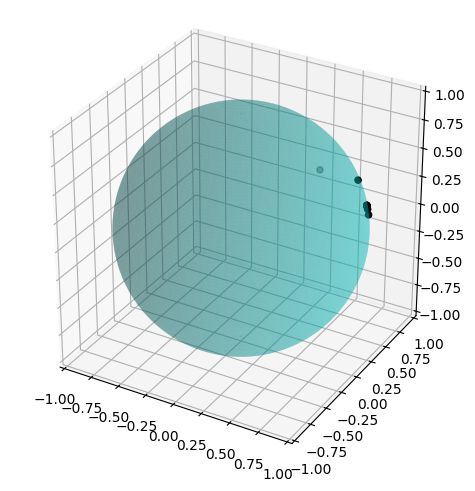

In [83]:
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)
ax.scatter(xs,ys,zs,color="k")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_aspect("equal")
plt.tight_layout()
plt.savefig('example7.png')
plt.show()

Plot the three different projections of the path for the 3D case

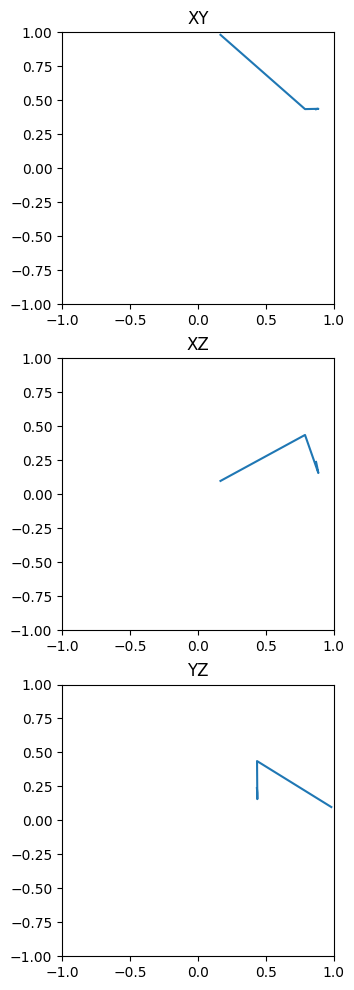

In [84]:
fig, axs = plt.subplots(3,1, figsize=(4,12))
axs[0].plot(xs,ys)
axs[1].plot(xs,zs)
axs[2].plot(ys,zs)
for i in range(3):
  axs[i].set_xlim([-1, 1])
  axs[i].set_ylim([-1, 1])
  axs[i].set_aspect('equal', adjustable='box')
axs[0].set_title('XY')
axs[1].set_title('XZ')
axs[2].set_title('YZ')
plt.show()

Plot the values of F over all the iterations

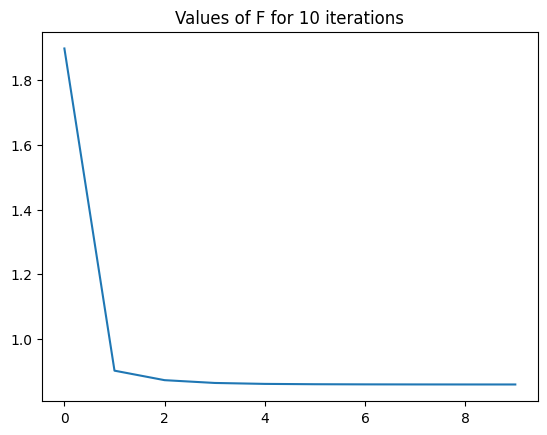

In [85]:
plt.plot(loss)
plt.title(f'Values of F for {10} iterations')
plt.savefig('example4.png')
plt.show()